##### Perform Trend of News Stories by Months

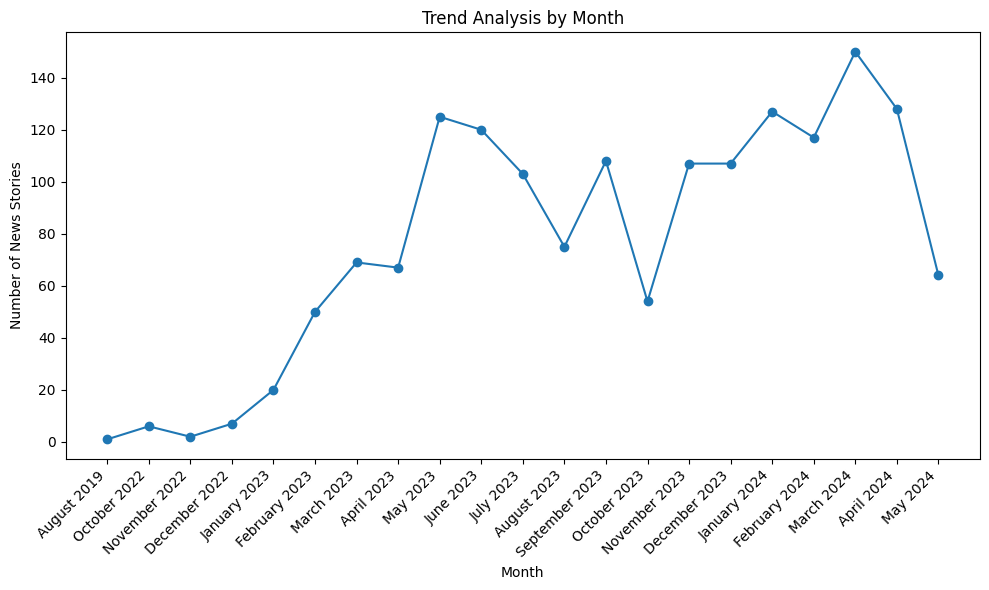

In [3]:
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import json

# Load cleaned corpus from JSON file
def load_clean_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# Extract month information from the "time" section
def extract_months(data):
    months = []
    for item in data:
        if item['time'] != "N/A":
            try:
                month = datetime.strptime(item['time'], '%B %d, %Y').strftime('%B %Y')
                months.append(month)
            except ValueError:
                pass  # Skip processing for invalid date formats or "N/A"
    return months

# Count occurrences of each month
def count_months(months):
    month_counts = Counter(months)
    return month_counts

# Perform trend analysis by month
def perform_trend_analysis_by_month(file_path):
    # Step 1: Load cleaned corpus
    data = load_clean_corpus(file_path)
    
    # Step 2: Extract month information
    months = extract_months(data)
    
    # Step 3: Count occurrences of each month
    month_counts = count_months(months)
    
    # Step 4: Sort months in chronological order
    sorted_months = sorted(month_counts.items(), key=lambda x: datetime.strptime(x[0], '%B %Y'))
    
    # Step 5: Extract sorted months and corresponding counts
    sorted_months, counts = zip(*sorted_months)
    
    # Step 6: Plot the trend
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_months, counts, marker='o', linestyle='-')
    plt.title('Trend Analysis by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of News Stories')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage with trend analysis by month
file_path = 'corpus_clean.json'
perform_trend_analysis_by_month(file_path)


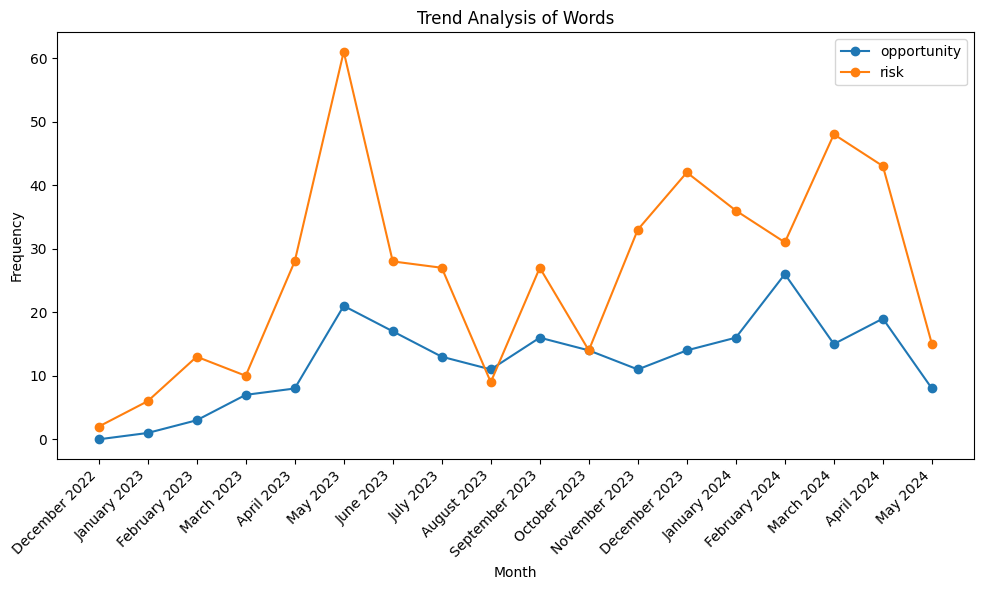

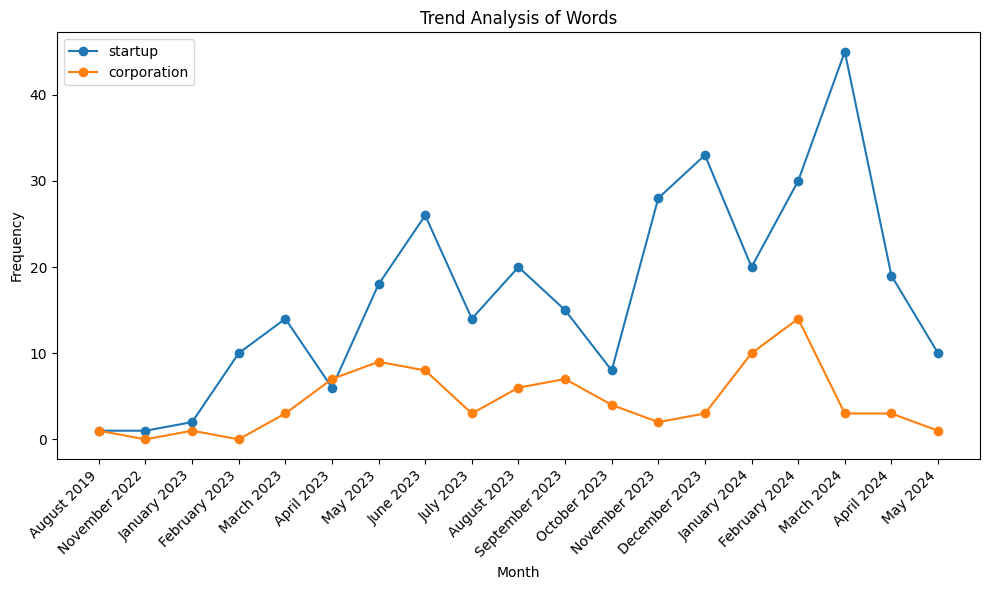

In [4]:
def perform_trend_analysis_by_words(words, file_path):
    # Load cleaned corpus
    data = load_clean_corpus(file_path)
    
    # Extract month information
    months = extract_months(data)
    
    # Initialize counts for each word
    word_counts = {word: Counter() for word in words}
    
    # Count occurrences of each word in each month
    for item in data:
        if item['time'] != "N/A":
            try:
                month = datetime.strptime(item['time'], '%B %d, %Y').strftime('%B %Y')
                if month in months:
                    for word in words:
                        if word in item['story_text'].lower():
                            word_counts[word][month] += 1
            except ValueError:
                continue  # Skip processing for invalid date formats
    
    # Sort months in chronological order
    sorted_months = sorted(set(month for word_counts_dict in word_counts.values() for month in word_counts_dict.keys()), 
                           key=lambda x: datetime.strptime(x, '%B %Y'))
    
    # Plot the trend for each word
    plt.figure(figsize=(10, 6))
    for word in words:
        counts = [word_counts[word][month] for month in sorted_months]
        plt.plot(sorted_months, counts, marker='o', label=word)
    
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    plt.title('Trend Analysis of Words')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
file_path = 'corpus_clean.json'
words_pair01 = ['opportunity', 'risk']
words_pair02 = ['startup', 'corporation']
perform_trend_analysis_by_words(words_pair01, file_path)
perform_trend_analysis_by_words(words_pair02, file_path)


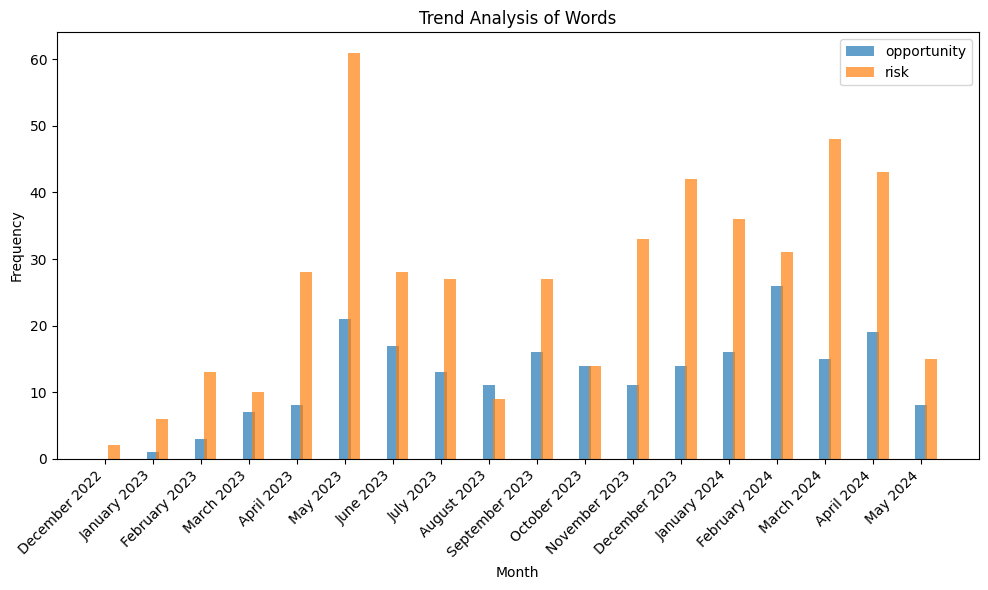

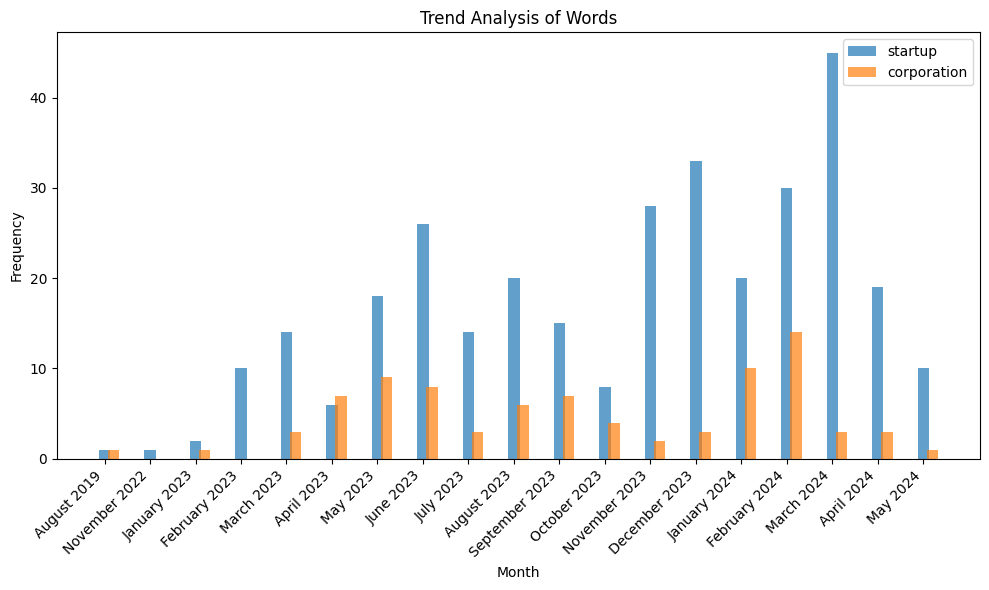

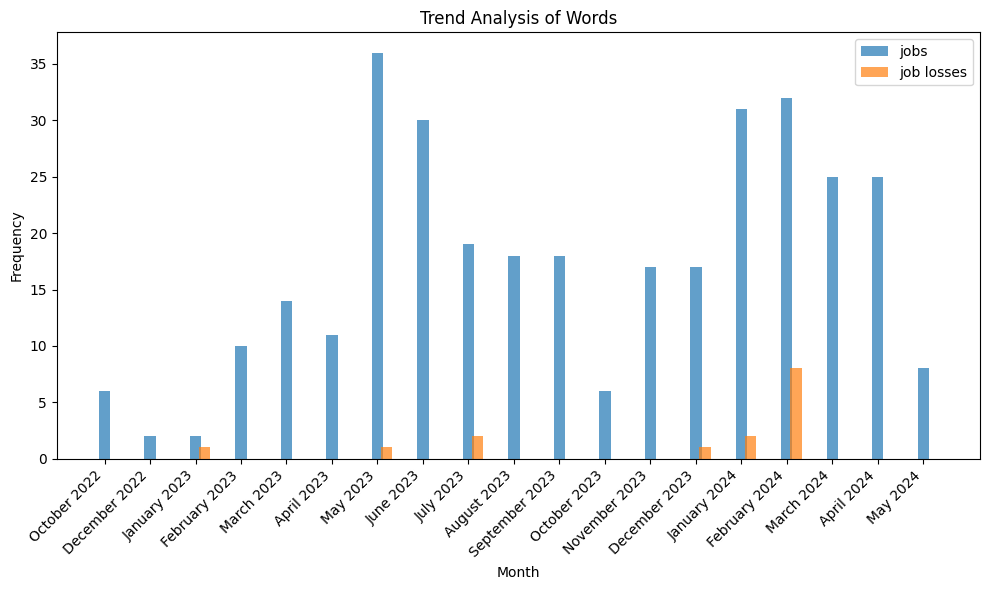

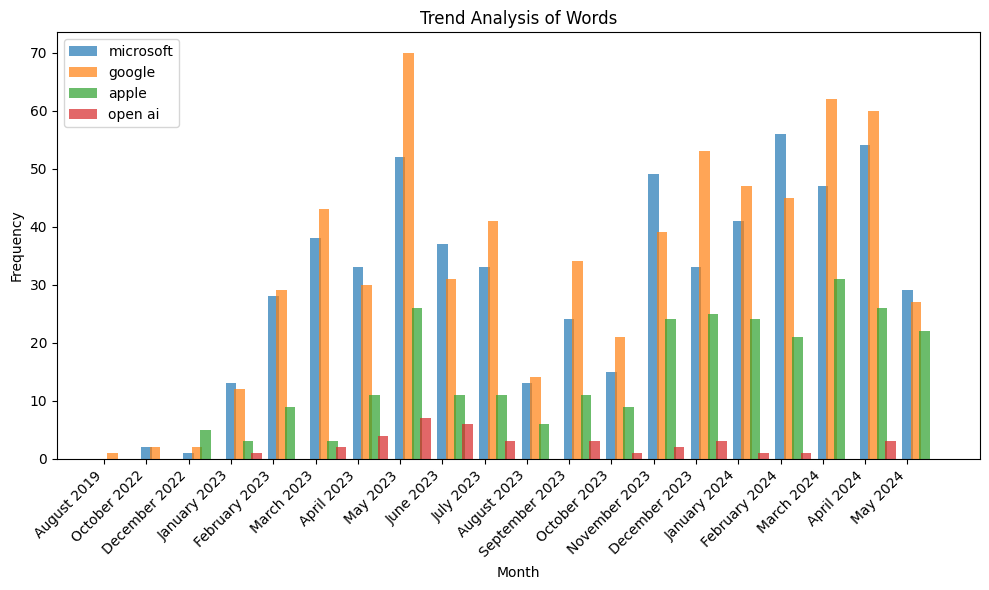

In [6]:
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import json

# Load cleaned corpus from JSON file
def load_clean_corpus(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# Extract month information from the "time" section
def extract_months(data):
    months = []
    for item in data:
        if item['time'] != "N/A":
            try:
                month = datetime.strptime(item['time'], '%B %d, %Y').strftime('%B %Y')
                months.append(month)
            except ValueError:
                pass  # Skip processing for invalid date formats or "N/A"
    return months

# Count occurrences of each month
def count_months(months):
    month_counts = Counter(months)
    return month_counts

# Perform trend analysis by word
def perform_trend_analysis_by_word(words, file_path):
    # Load cleaned corpus
    data = load_clean_corpus(file_path)
    
    # Extract month information
    months = extract_months(data)
    
    # Initialize counts for each word
    word_counts = {word: Counter() for word in words}
    
    # Iterate through each story and extract word counts
    for item in data:
        if item['time'] != "N/A":
            try:
                month = datetime.strptime(item['time'], '%B %d, %Y').strftime('%B %Y')
                if month in months:
                    for word in words:
                        if word in item['story_text'].lower():
                            word_counts[word][month] += 1
            except ValueError:
                pass  # Skip processing for invalid date formats
    
    # Sort months in chronological order
    sorted_months = sorted(set(month for counts in word_counts.values() for month in counts.keys()), key=lambda x: datetime.strptime(x, '%B %Y'))
    
    # Plot the trend for each word as a histogram
    plt.figure(figsize=(10, 6))
    for i, word in enumerate(words):
        counts = [word_counts[word][month] for month in sorted_months]
        plt.bar([j + i * 0.2 for j in range(len(sorted_months))], counts, width=0.25, label=word, alpha=0.7)
    
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    plt.title('Trend Analysis of Words')
    plt.xticks(range(len(sorted_months)), sorted_months, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
file_path = 'corpus_clean.json'
words_pair01 = ['opportunity', 'risk']
words_pair02 = ['startup', 'corporation']
words_pair03 = ['jobs', 'job losses']
words_pair04 = ['microsoft', 'google', 'apple', 'open ai']
perform_trend_analysis_by_word(words_pair01, file_path)
perform_trend_analysis_by_word(words_pair02, file_path)
perform_trend_analysis_by_word(words_pair03, file_path)
perform_trend_analysis_by_word(words_pair04, file_path)
